### This file consists of CNN method of classification

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used for rescaling the images
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

### Data Augmentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1) 
        zoom_range=0.2,#to apply zoom
        rotation_range =15,#rotating image by 15deg
        horizontal_flip=True)  # image will be flipped horizontally
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Load the dataset

In [3]:
training_set = train_datagen.flow_from_directory(
        './car_data/train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = True,
        seed=42)
val_set = val_datagen.flow_from_directory(
        './car_data/val',
        target_size=(224,224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = False,
        seed=42 )
test_set = val_datagen.flow_from_directory(
        './car_data/test',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = False,
        seed=42 )

Found 165 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [4]:
training_set.class_indices 

{'alpha': 0, 'audi': 1, 'bmw': 2, 'jag': 3, 'merce': 4}

In [5]:
val_set.class_indices 

{'alpha': 0, 'audi': 1, 'bmw': 2, 'jag': 3, 'merce': 4}

In [6]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

### model building using CNN

In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
                                 #model.add(Dropout(0.1)),
                                 tf.keras.layers.MaxPool2D(2,2), 
                                  tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),     
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),  
                                 tf.keras.layers.Dropout(0.3),
                                 #tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                 #tf.keras.layers.MaxPool2D(2,2), 
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(5,activation='softmax')                       
                                 ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        4

### Compiling the model 

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             #optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

### model training

In [10]:
model_fit=model.fit(training_set,
                   steps_per_epoch=17,
                   epochs=25,
                   validation_data=val_set)

Epoch 1/25
17/17 [==============================] - 11s 657ms/step - loss: 1.8639 - accuracy: 0.2061 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/25
17/17 [==============================] - 11s 647ms/step - loss: 1.6114 - accuracy: 0.2242 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 3/25
17/17 [==============================] - 11s 636ms/step - loss: 1.5934 - accuracy: 0.2364 - val_loss: 1.6051 - val_accuracy: 0.3000
Epoch 4/25
17/17 [==============================] - 11s 638ms/step - loss: 1.5753 - accuracy: 0.3758 - val_loss: 1.5664 - val_accuracy: 0.3333
Epoch 5/25
17/17 [==============================] - 11s 634ms/step - loss: 1.5127 - accuracy: 0.3636 - val_loss: 1.5691 - val_accuracy: 0.3000
Epoch 6/25
17/17 [==============================] - 11s 659ms/step - loss: 1.4711 - accuracy: 0.3818 - val_loss: 1.5177 - val_accuracy: 0.3333
Epoch 7/25
17/17 [==============================] - 11s 628ms/step - loss: 1.3419 - accuracy: 0.4667 - val_loss: 1.4157 - val_accuracy: 0.4333

### Evaluation of the model by plotting the accuarcy and loss plots

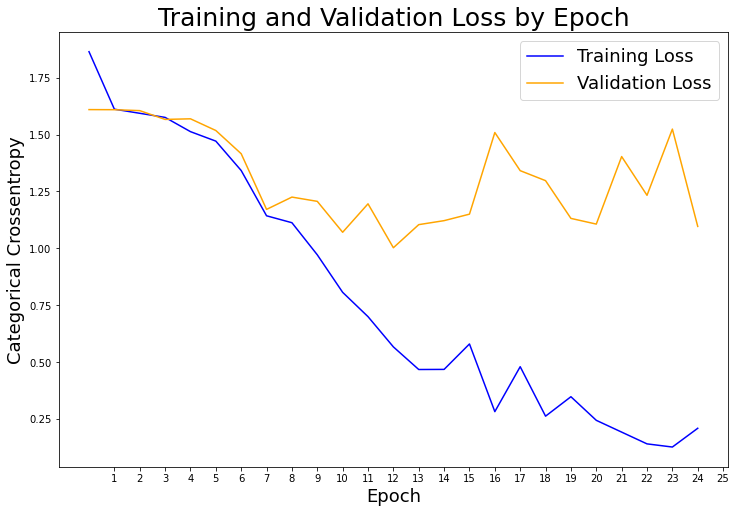

In [12]:
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import numpy as np
%matplotlib inline
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train loss and test loss over epochs.
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

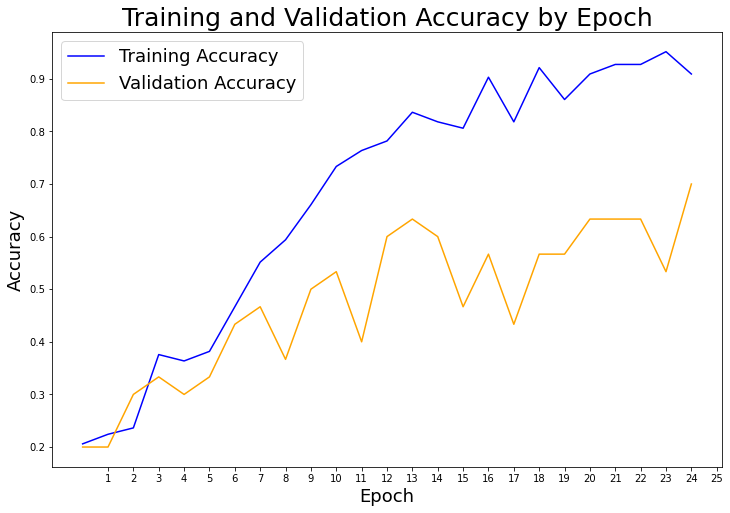

In [13]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train accuracy and test accuracy over epochs.
train_loss = model_fit.history['accuracy']
val_loss = model_fit.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(val_loss, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### save the model for predictions

In [14]:
model.save('car_image_classification.h5') #save the model 

## Model predictions on the dataset

## Confusion Matrix

In [18]:
target_names = []

for key in training_set.class_indices:

    target_names.append(key)

In [21]:
import itertools  

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')



Confusion matrix, without normalization


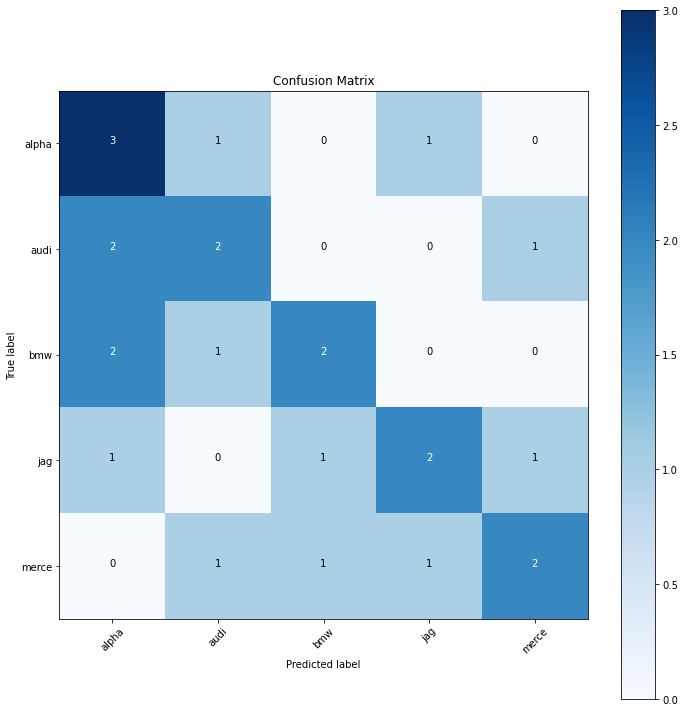

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_generator(test_set)

y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_set.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

## saved model is checked for test set

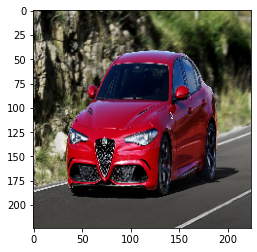

[0]
the predicted CAR image is AlphaRomeo Stelvio


In [41]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from IPython.display import IFrame 
import matplotlib.pyplot as plt

# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = load_model('car_image_classification.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = image.load_img('car_data\\test\\alpha\\alph (5).jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes)
a = classes
if a == 0:
    print("the predicted CAR image is AlphaRomeo Stelvio")
    os.startfile("https://bit.ly/2ZMb6hk")
   
elif a == 1:
    print("the predicted CAR image is Audi A3 Sportback")
    os.startfile("https://bit.ly/3pOQrUo")
    
elif a == 2:
    print("the predicted CAR image is BMW 1 series")
    os.startfile("https://bit.ly/3dHgMl0")
   
elif a == 3:
    print("the predicted CAR image is Jaguar f-pace")
    os.startfile("https://bit.ly/2NY1Yn5")
    
else:
    print("the predicted CAR image is Mercedes A1 Limouse")
    os.startfile("https://bit.ly/3khQPdd")
    

### The CNN model built here are able to classify the images to a greater extent. However, as the dataset increases the convolution layers must be tuned depending on the complexity of the data

## The model provides an accuracy of 70% which can be termed as a better model for the acquired dataset.